# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction
we have KaggleV2-May-2016.csv file [Medical Appointment No Shows] that contains dataset of [14 columns and 110526 entries] we are going to analysis
### Dataset of Medical Appointment No Shows [Description] 
A person makes a doctor appointment, receives all the instructions and no-show.
110.527 medical appointments its 14 associated variables (characteristics). 
The most important one if the patient show-up or no-show to the appointment

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.
What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?
Gapminder World Gapminder has collected

### Question for Analysis
The most important one if the patient show-up or no-show to the appointment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

In [ ]:
<a id='wrangling'></a>
## Data Wrangling

we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.


### General Properties

In [2]:
# Load your data and print out a few lines. 
df_medical=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df_medical.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# view dimensions of dataset
df_medical.shape


(110527, 14)

#### the result shows the dimensions of dataset 110527 rows and 14 columns

In [4]:
#summary statistics
df_medical.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### the range of the Age between 18 and 55 years old and min age is -1 there is a mistake and we should clean this value

In [4]:
# view missing value count for each feature
df_medical.isnull().sum() 


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### the result shows that we don't have any missing values

In [5]:
#Perform operations to inspect data types and look for instances of missing or possibly errant data.
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### the result shows the number of each dtypes: float64(1), int64(8), object(5)

In [6]:
# check duplicates 
df_medical.duplicated().sum()

0

#### there no identical duplicated rows

In [8]:
#check unique values
df_medical.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# number of unique values
df_medical['PatientId'].nunique()

62299

##### there is only 62299 unique PatientId from 110527 that refer to duplicated PatientId

In [7]:
# check numbers of duplicated PatientId
df_medical['PatientId'].duplicated().sum()

48228

#### the result shows 48228 duplicated PatientId


### Data Cleaning


In [8]:
# drop -1 value from Age column
m=df_medical.query('Age == -1')
m

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


#### there  is only 1 row that has the value -1 with index 99832

In [9]:
df_medical.drop(index=99832 , inplace= True)

In [10]:
df_medical.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
# replace spaces with underscores and lowercase labels 
df_medical.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_medical.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
# correct columns name hypertension instead of hipertension
df_medical.rename(columns={'hipertension':'hypertension'}, inplace=True)
df_medical.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### summary of Data Wrangling
After loading data to our workplace as data frame using pandas ,then view dimensions of dataset shows 110527 rows and 14 columns
summary statistics shows the range of the Age is between 18 and 55 years old and min age is -1 there is a mistake and we should clean this value,
then ,Perform operations to inspect data types and look for instances of missing values ,the result shows that we don't have any missing values and  the number of each dtypes: float64(1), int64(8), object(5)
then check duplicates of indentical rows the result shows there is no identical duplicated rows , check number of unique values here is only 62299 unique PatientId from 110527 that refer to duplicated PatientId
the result shows 48228 duplicated PatientId ,there is only 1 row that has the value -1 with index 99832 drpping this row,correct columns name hypertension instead of hipertension

<a id='eda'></a>
## Exploratory Data Analysis

After we have trimmed and cleaned our data, we're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions Investigate the stated question from multiple angles. 



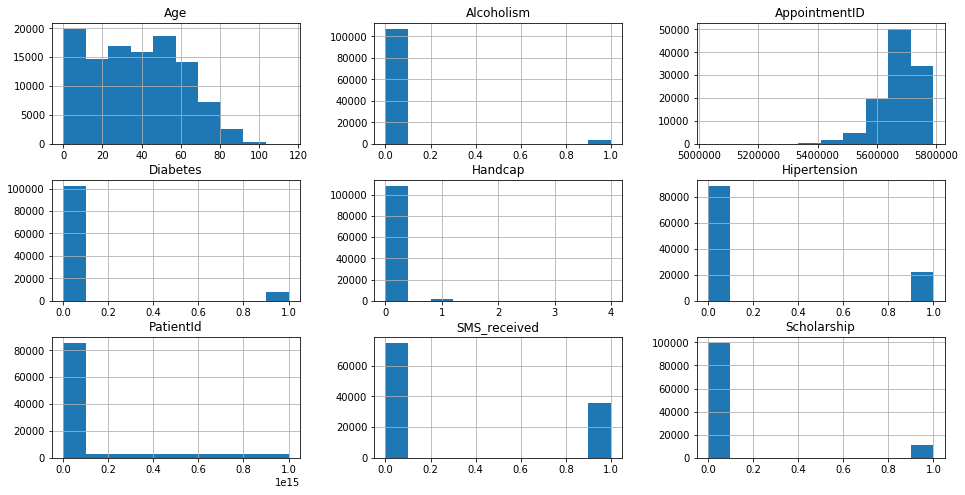

In [17]:
# overview of general histograms
df_medical.hist(figsize=(16,8));

##### the general overview of histograms shows the disribution of Patient age from 0 to 100 ,The majority of patients don't drink alcohol, don't have diabetices but 25% have hypertensionand The majority of patients have scholarship , There are 50% of patients receive sms 

In [13]:
#dividing dataset into two group [show or no show ]
df_show=df_medical['no-show']== 'No'
df_noshow=df_medical['no-show'] =='Yes'

In [14]:
#statical descriptive [count,mean,median,25%,50%,75%,max,min]
df_medical[df_show].describe(),df_medical[df_noshow].describe()

(          patientid  appointmentid           age   scholarship  hypertension  \
 count  8.820700e+04   8.820700e+04  88207.000000  88207.000000  88207.000000   
 mean   1.476809e+14   5.681135e+06     37.790504      0.093904      0.204394   
 std    2.563739e+14   6.931193e+04     23.338645      0.291697      0.403261   
 min    3.921784e+04   5.030230e+06      0.000000      0.000000      0.000000   
 25%    4.168386e+12   5.646218e+06     18.000000      0.000000      0.000000   
 50%    3.176138e+13   5.685683e+06     38.000000      0.000000      0.000000   
 75%    9.433684e+13   5.731078e+06     56.000000      0.000000      0.000000   
 max    9.999816e+14   5.790484e+06    115.000000      1.000000      1.000000   
 
            diabetes    alcoholism       handcap  sms_received  
 count  88207.000000  88207.000000  88207.000000  88207.000000  
 mean       0.073838      0.030417      0.022742      0.291337  
 std        0.261508      0.171733      0.162751      0.454381  
 min     

In [37]:
#information data types,and memory usage
df_medical[df_show].info(),df_medical[df_noshow].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88207 entries, 0 to 110526
Data columns (total 14 columns):
patientid         88207 non-null float64
appointmentid     88207 non-null int64
gender            88207 non-null object
scheduledday      88207 non-null object
appointmentday    88207 non-null object
age               88207 non-null int64
neighbourhood     88207 non-null object
scholarship       88207 non-null int64
hypertension      88207 non-null int64
diabetes          88207 non-null int64
alcoholism        88207 non-null int64
handcap           88207 non-null int64
sms_received      88207 non-null int64
no-show           88207 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 10.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 14 columns):
patientid         22319 non-null float64
appointmentid     22319 non-null int64
gender            22319 non-null object
scheduledday      22319 non-null object
appo

(None, None)

#### the result shows there are 88207 show and 22319 are absent 


#   investigate Affected factors on Attendance Rate


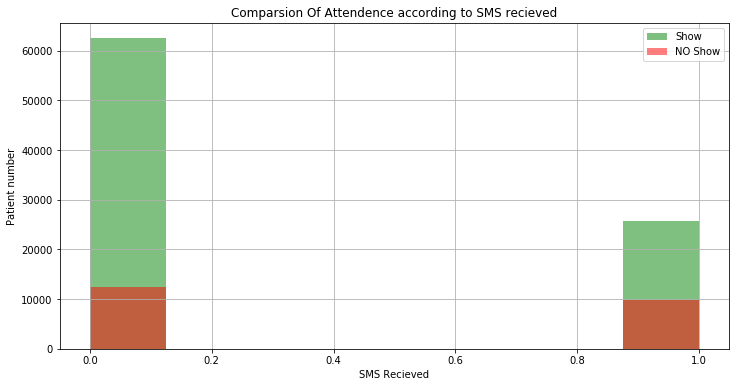

In [15]:
#Does SMS affect to attendance
def sms(df,col_name,atten,absent):
    plt.figure(figsize=[12,6])
    df[col_name][df_show].hist(alpha=0.5,bins=8,color='green',label='Show')
    df[col_name][df_noshow].hist(alpha=0.5,bins=8,color='red',label='NO Show')
    plt.legend();
    plt.title('Comparsion Of Attendence according to SMS recieved')
    plt.xlabel('SMS Recieved')
    plt.ylabel('Patient number');
sms(df_medical,"sms_received",df_show,df_noshow)
    

### the result show the number of attendence are high of people recived sms

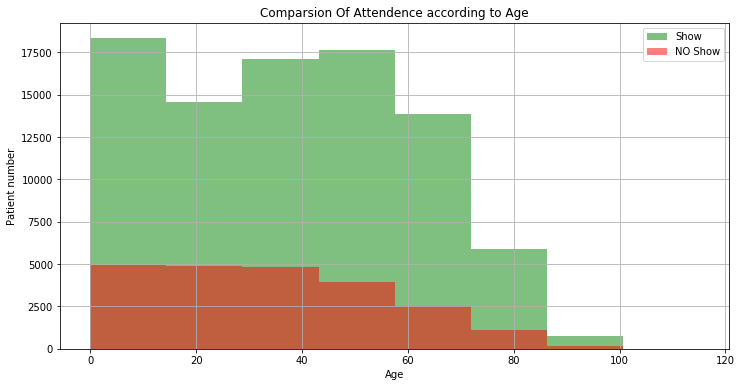

In [16]:
#Does SMS affect to attendance
def age(df,col_name,atten,absent):
    plt.figure(figsize=[12,6])
    df[col_name][df_show].hist(alpha=0.5,bins=8,color='green',label='Show')
    df[col_name][df_noshow].hist(alpha=0.5,bins=8,color='red',label='NO Show')
    plt.legend();
    plt.title('Comparsion Of Attendence according to Age')
    plt.xlabel('Age')
    plt.ylabel('Patient number');
age(df_medical,"age",df_show,df_noshow)

### Age from zero to 15 are the most showing parents taking thier childern to take care of them ,and then 42:58 and we note older patient 75:85 get low attendance

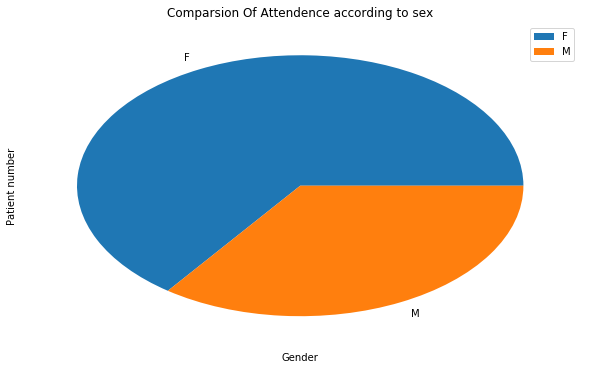

In [17]:
#Does kind of sex affect to attendance
def sex(df,col_name,atten):
    plt.figure(figsize=[10,6])
    df[col_name][df_show].value_counts(normalize= True).plot(kind="pie",label='Show')
    plt.legend();
    plt.title('Comparsion Of Attendence according to sex')
    plt.xlabel('Gender')
    plt.ylabel('Patient number');
sex(df_medical,"gender",df_show)

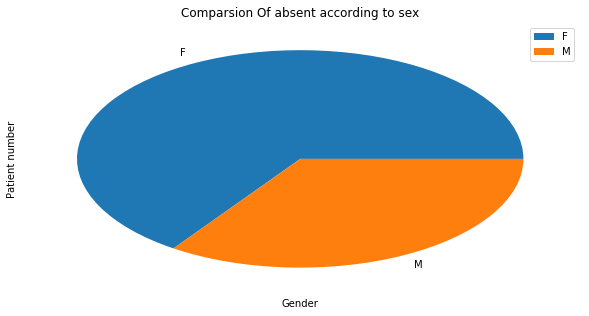

In [18]:
#Does kind of sex affect to absent
def sex(df,col_name,absent):
    plt.figure(figsize=[10,5])
    df[col_name][df_noshow].value_counts(normalize= True).plot(kind="pie",label='NO Show')
    plt.legend();
    plt.title('Comparsion Of absent according to sex')
    plt.xlabel('Gender')
    plt.ylabel('Patient number');
sex(df_medical,"gender",df_noshow)

Text(0,0.5,'Age')

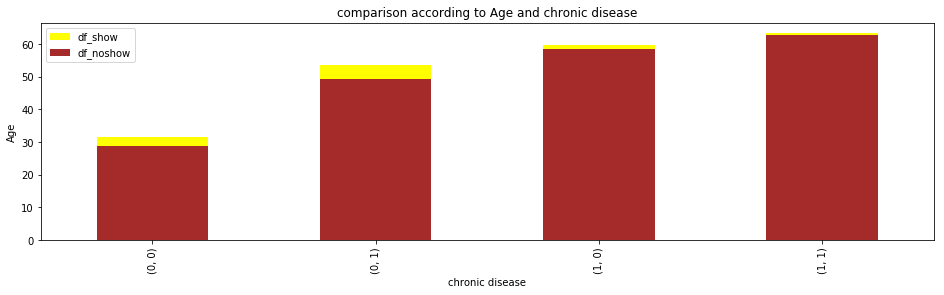

In [21]:
# Does Age and chronic disease affect on attendance rate
plt.figure(figsize=[16,4])
df_medical[df_show].groupby(["hypertension","diabetes"]).mean()['age'].plot(kind="bar",color="yellow",label="df_show")
df_medical[df_noshow].groupby(["hypertension","diabetes"]).mean()['age'].plot(kind="bar",color="brown",label="df_noshow")
plt.legend();
plt.title("comparison according to Age and chronic disease")
plt.xlabel('chronic disease')
plt.ylabel('Age')

In [22]:
df_medical[df_noshow].groupby(["hypertension","diabetes"]).mean()['age'],df_medical[df_show].groupby(["hypertension","diabetes"]).mean()['age']

(hypertension  diabetes
 0             0           28.834155
               1           49.183391
 1             0           58.377043
               1           62.820333
 Name: age, dtype: float64, hypertension  diabetes
 0             0           31.510433
               1           53.666952
 1             0           59.702144
               1           63.406361
 Name: age, dtype: float64)

#### the result shows the average age of non chronic disease that attend is 30 and not showing is 28 ,there is no correlation between chronic disease and attendance


Text(0,0.5,'The number of patients')

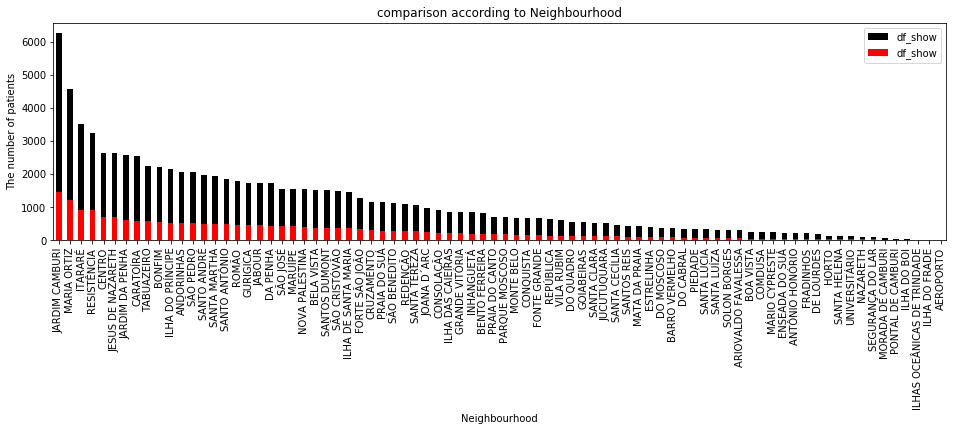

In [23]:
# Does neighbourhood affect on Attendance
plt.figure(figsize=[16,4])
df_medical.neighbourhood[df_show].value_counts().plot(kind="bar",color="black",label="df_show")
df_medical.neighbourhood[df_noshow].value_counts().plot(kind="bar",color="red",label="df_show")
plt.legend();
plt.title("comparison according to Neighbourhood")
plt.xlabel('Neighbourhood')
plt.ylabel('The number of patients')

### the result shows neighbourhood has agreat affect espeially Jardim and Maria Ortiz

<a id='conclusions'></a>
## Conclusions
##### SMS affect to attendance because the number patients recived sms are higher than they don't recieved sms Age also affect to attendance that show young patient from 0:18 get high show then 42:58 and we note older patient 75:85 get low attendanceGender dosent  affect to attendance there is no clear correlation neighbourhood has agreat affect espeially Jardim and Maria Ortiz and also has great showing rate

## limitation 
#### There is no clear correlation in chronic disease and Age

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0